<a href="https://colab.research.google.com/github/fowardelcac/Abandono-Escolar/blob/main/Notebooks/conclusiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
!git clone https://github.com/fowardelcac/Abandono-Escolar.git

fatal: destination path 'Abandono-Escolar' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
sector = pd.read_csv('/content/Abandono-Escolar/Dataset/datasets2/Data_with_sector.csv').drop('Unnamed: 0', axis = 1)
df = pd.read_csv('/content/Abandono-Escolar/Dataset/datasets2/df.csv').drop('Unnamed: 0', axis = 1)
internat = pd.read_csv('/content/Abandono-Escolar/Dataset/dataset.csv')['International']

In [5]:
df.head()

,Marital status,attendance,Esn,Debtor,fees,Gender,scholarship,Target,Sector_Agronomy and Veterinary Science,Sector_Business and Communication,...,Age at enrollment,Unemployment rate,Inflation rate,GDP,Enrolled1,Approved1,Enrolled2,Approved2,Tasa_1st,Tasa_2nd
0,0,1,0,0,1,1,0,0,0,0,...,20,10.8,1.4,1.74,0,0,0,0,0.000000,0.000000
1,0,1,0,0,0,1,0,1,0,0,...,19,13.9,-0.3,0.79,6,6,6,6,100.000000,100.000000
2,0,1,0,0,0,1,0,0,0,0,...,19,10.8,1.4,1.74,6,0,6,0,0.000000,0.000000
3,0,1,0,0,1,0,0,1,0,1,...,20,9.4,-0.8,-3.12,6,6,6,5,100.000000,83.333333
4,1,0,0,0,1,0,0,1,0,0,...,45,13.9,-0.3,0.79,6,5,6,6,83.333333,100.000000


# ¿Como esta distribuida la edad de los estudiantes?

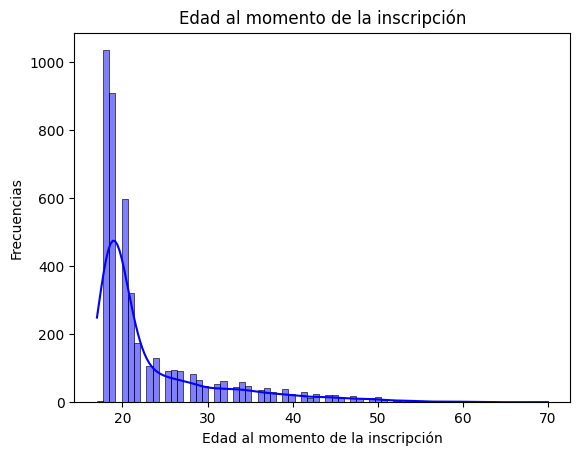

In [6]:
sns.histplot(df['Age at enrollment'], kde=True, color='blue')  # kde=True agrega una estimación de la densidad del kernel.
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Frecuencias')
plt.title('Edad al momento de la inscripción')
plt.show()

In [7]:
df['Age at enrollment'].describe()

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

Apartir del grafico y algunos estadisticos, podemos ver que el 75% de los estudiantes se inscriben para comenzar sus estudios universitarios entre los 17 y 25 años.

# Genero
### ¿Cuantos hombres y mujeres cursan carreras universitarias? ¿Las mujeres terminan su cursado mas que los hombres?

In [8]:
def frecuencia_relativa(muestra, subconjunto):
  N = len(muestra)
  return ((len(subconjunto) / N) * 100)

In [9]:
print(f'Proporccion de hombres con respecto a la muestra: {frecuencia_relativa(df, df[df.Gender == 1]):.2f}%')
print(f'Proporccion de mujeres con respecto a la muestra: {frecuencia_relativa(df, df[df.Gender == 0]):.2f}%')

Proporccion de hombres con respecto a la muestra: 35.17%
Proporccion de mujeres con respecto a la muestra: 64.83%


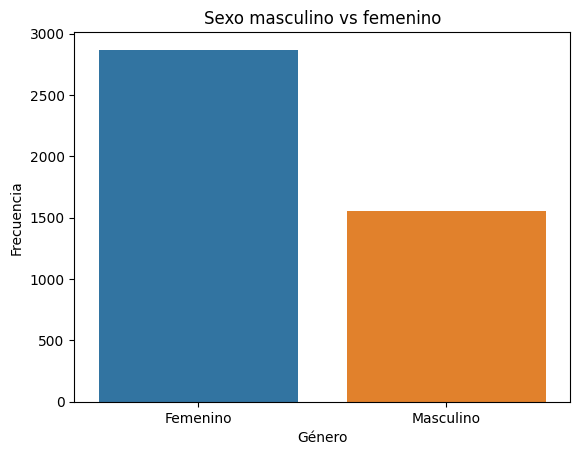

In [10]:
sns.countplot(x='Gender', data=df)

plt.ylabel("Frecuencia")
plt.xlabel("Género")
plt.title("Sexo masculino vs femenino")
plt.xticks(ticks=[0,1], labels=['Femenino','Masculino'])

# Muestra el gráfico
plt.show()

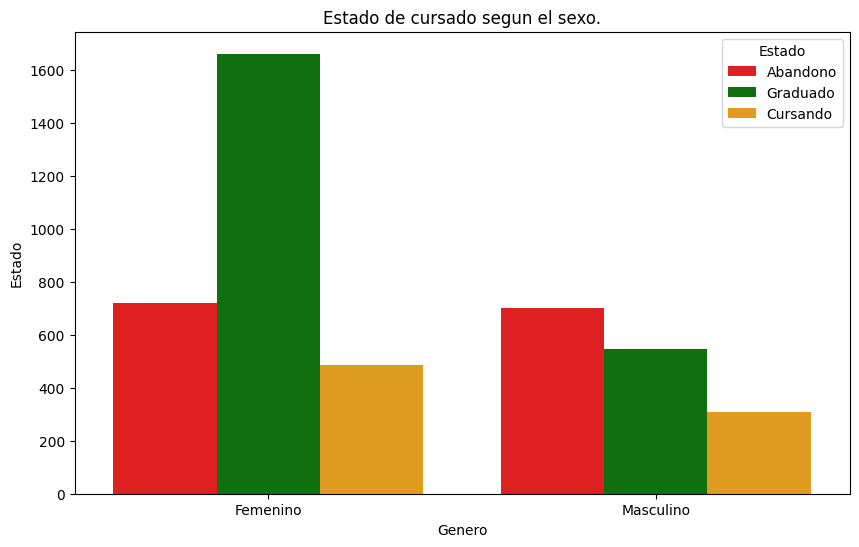

In [11]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.countplot(data = df, x ='Gender', hue = 'Target', palette = {0: "red", 1: "green", 2: 'orange'})
# Personalizar el gráfico
plt.title("Estado de cursado segun el sexo.")
plt.xlabel("Genero")
plt.ylabel("Estado")
plt.legend(title = "Estado", labels=["Abandono", "Graduado", "Cursando"])
plt.xticks(ticks=[0,1], labels=['Femenino','Masculino'])
# Mostrar el gráfico
plt.show()

In [12]:
df_graduate = df[df.Target == 1]
h = frecuencia_relativa(df_graduate, df_graduate[df_graduate.Gender == 1])
m = frecuencia_relativa(df_graduate, df_graduate[df_graduate.Gender == 0])
print(f'Cada 100 estudiantes graduados hay: {h:.2f} hombres y {m:.2f} mujeres')

Cada 100 estudiantes graduados hay: 24.81 hombres y 75.19 mujeres


## Claramente podemos ver que Las mujeres se graduan tres veces mas que los hombres, pero a su vez dentro de la muestra existe casi el doble(1.8 veces mas) de mujeres que hombres, podriamos asumir que existe algun tipo de sesgo no intencional en la muestra cometido durante el censado

### ¿el sexo tiene alguna influencia en la decision de la carrera?

In [13]:
dic = (sector.Sector.value_counts()).to_dict()

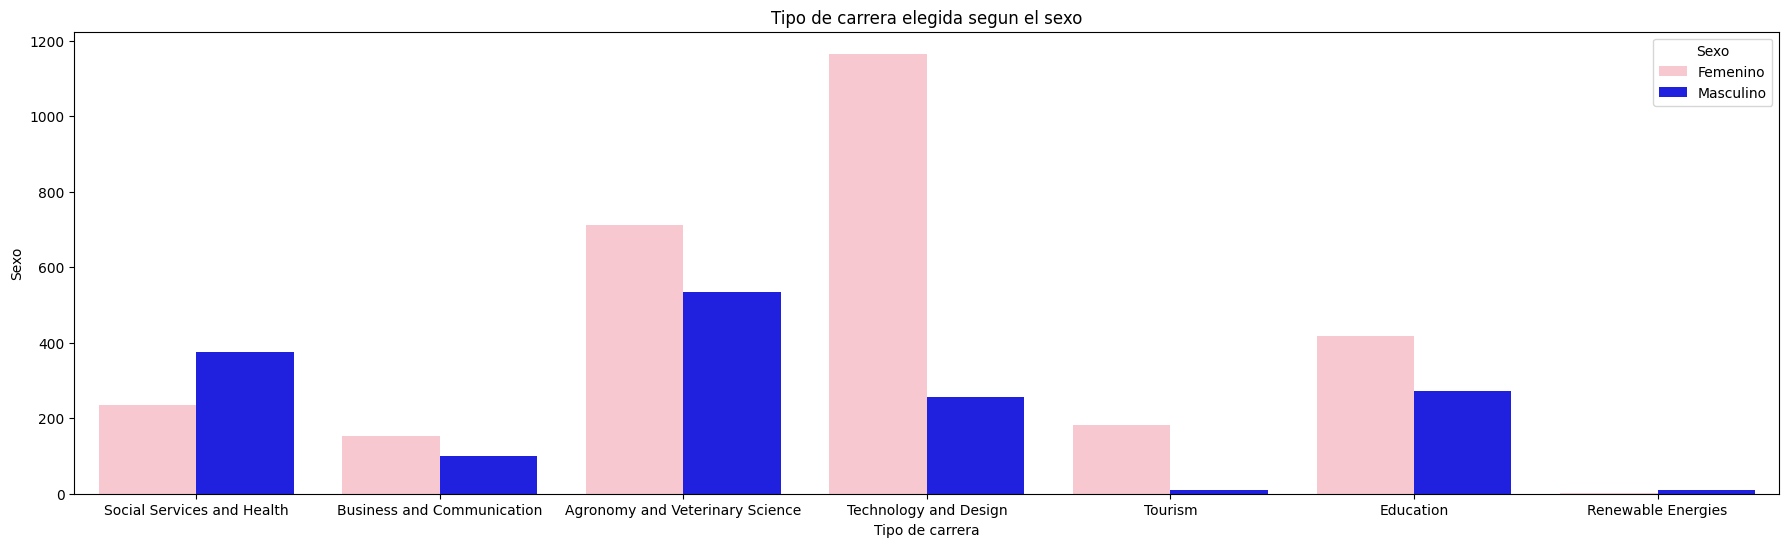

In [14]:
plt.figure(figsize=(22, 6))  # Tamaño de la figura
sns.countplot(data = sector, x ='Sector', hue = 'Gender', palette = {0: "pink", 1: "blue"})
# Personalizar el gráfico
plt.title("Tipo de carrera elegida segun el sexo")
plt.xlabel("Tipo de carrera")
plt.ylabel("Sexo")
plt.legend(title = "Sexo", labels=['Femenino','Masculino'])
plt.xticks(ticks=range(len(dic)), labels=dic.keys())
# Mostrar el gráfico
plt.show()

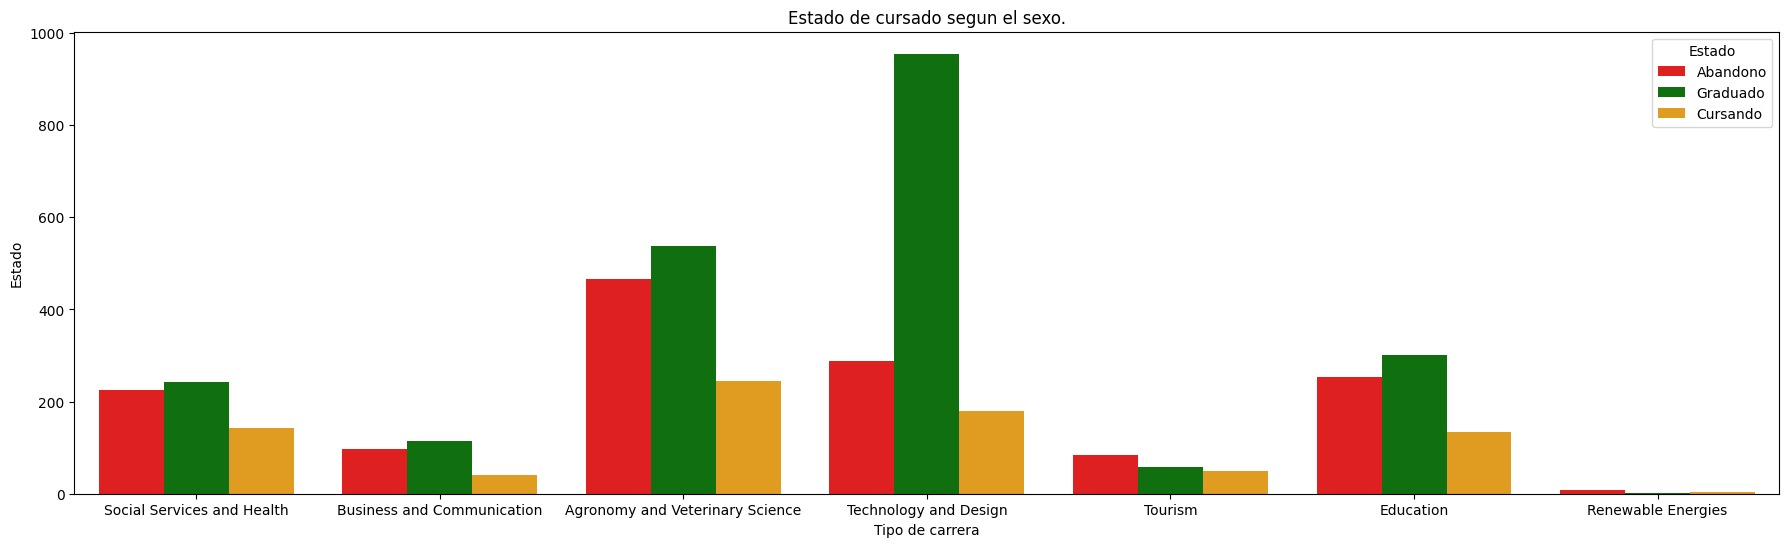

In [15]:
plt.figure(figsize=(22, 6))  # Tamaño de la figura
sns.countplot(data = sector, x ='Sector', hue = 'Target',  palette = {0: "red", 1: "green", 2: 'orange'})
# Personalizar el gráfico
plt.title("Estado de cursado segun el sexo.")
plt.xlabel("Tipo de carrera")
plt.ylabel("Estado")
plt.legend(title = "Estado", labels=["Abandono", "Graduado", "Cursando"])
plt.xticks(ticks=range(len(dic)), labels=dic.keys())
# Mostrar el gráfico
plt.show()

## Se puede apreciar que los dos sectores 'Tecnologia y diseño' y 'Agronomia y ciencias veterinarias' son las carreras con mas graduados, y si observamios en el primer grafico vemos que ambas carreras cuentran con un mayor cursado de mujeres, podriamos suponer que esto podria generar una influencia en el porque las mujeres se graduan tres veces mas que los hombres

# ¿La universidad acepta personas con discapacidad?¿Terminan la carrera?



In [18]:
df.Esn.value_counts()

0    4373
1      51
Name: Esn, dtype: int64

In [28]:
esn = df[df.Esn == 1]
esn_abandono = esn[esn.Target == 0]
esn_graduados = esn[esn.Target == 1]
esn_cursando = esn[esn.Target == 2]

print(f'Alumnos que abandonan: {frecuencia_relativa(esn, esn_abandono):.2f}%')
print(f'Alumnos que se graduan: {frecuencia_relativa(esn, esn_graduados):.2f}%')
print(f'Alumnos que se mantinen cursando: {frecuencia_relativa(esn, esn_cursando):.2f}%')

Alumnos que abandonan: 33.33%
Alumnos que se graduan: 45.10%
Alumnos que se mantinen cursando: 21.57%


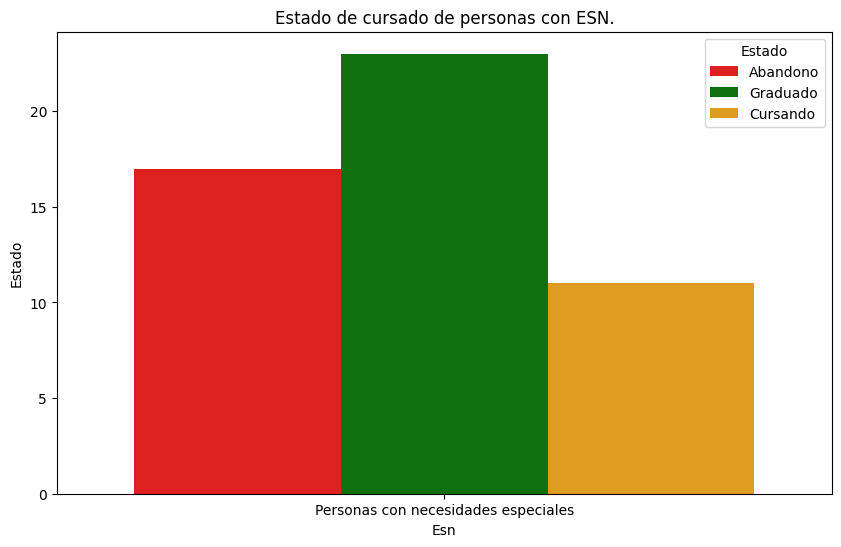

In [29]:
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.countplot(data = esn, x ='Esn', hue = 'Target',  palette = {0: "red", 1: "green", 2: 'orange'})
# Personalizar el gráfico
plt.title("Estado de cursado de personas con ESN.")
plt.ylabel("Estado")
plt.legend(title = "Estado", labels=["Abandono", "Graduado", "Cursando"])
plt.xticks(ticks=[0], labels = ['Personas con necesidades especiales'])
# Mostrar el gráfico
plt.show()

La universidad acepta personas con necesidades especiales, de los cuales la mayoria se graduan(45%), de todas fromas dentro de la muestra solamente existen 51 observaciones, probablemente no sea un gran predictor de exito universitario

# ¿Cuenta con becarios?¿lo reciben personas que son extranjeras?¿tienen exito?

In [79]:
dd = sector.Sector
data_b = df.filter(['Target', 'scholarship', 'Gender', 'Esn'], axis = 1)
data = pd.concat([data_b, internat, dd], axis=1)
data

,Target,scholarship,Gender,Esn,International,Sector
0,0,0,1,0,0,Technology and Design
1,1,0,1,0,0,Tourism
2,0,0,1,0,0,Technology and Design
3,1,0,0,0,0,Business and Communication
4,1,0,0,0,0,Social Services and Health
...,...,...,...,...,...,...
4419,1,0,1,0,0,Business and Communication
4420,0,0,0,0,1,Business and Communication
4421,0,1,0,0,0,Social Services and Health
4422,1,1,0,0,0,Business and Communication


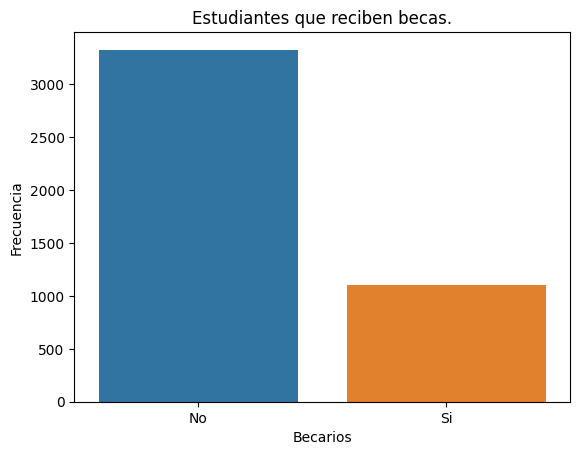

In [46]:
sns.countplot(x='scholarship', data=data)

plt.ylabel("Frecuencia")
plt.xlabel("Becarios")
plt.title("Estudiantes que reciben becas.")
plt.xticks(ticks=[0,1], labels=['No','Si'])

# Muestra el gráfico
plt.show()

# Aproximadamente 1/3 de los alumnos estudian gracias a becas
## ¿existe alguna preferencia en cuanto genero, nacionalidad, personas con necesidades educativas diferentes?

In [67]:
def count_plot(data, x, hue, palette, cat):
  plt.figure(figsize=(8, 6))
  sns.countplot(data = data_becarios, x = x, hue = hue, palette = palette)
  plt.title(f"Estudiantes que reciben becas comparado por {cat}")
  plt.ylabel("Frecuencia")
  plt.xlabel("Becarios")
  plt.xticks(ticks = [0], labels= [])

In [84]:
data_becarios = data[data.scholarship == 1]

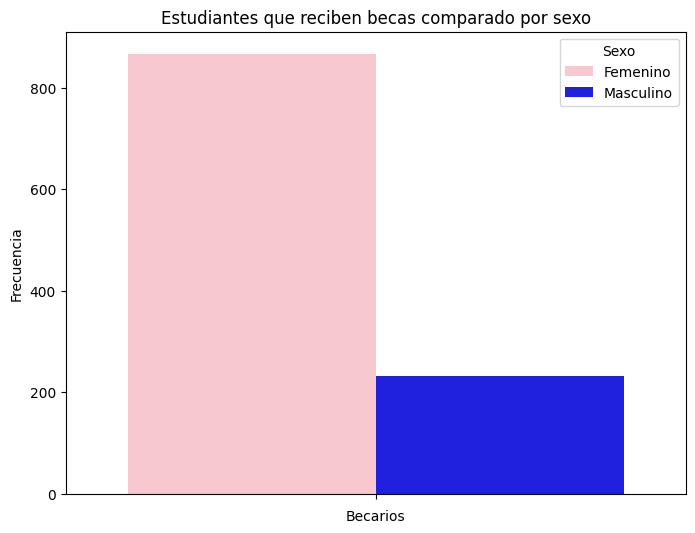

In [69]:
count_plot(data_becarios, x ='scholarship', hue = 'Gender', palette = {0: "pink", 1: "blue"}, cat = 'sexo')
plt.legend(title = "Sexo", labels=['Femenino','Masculino'])
plt.show()

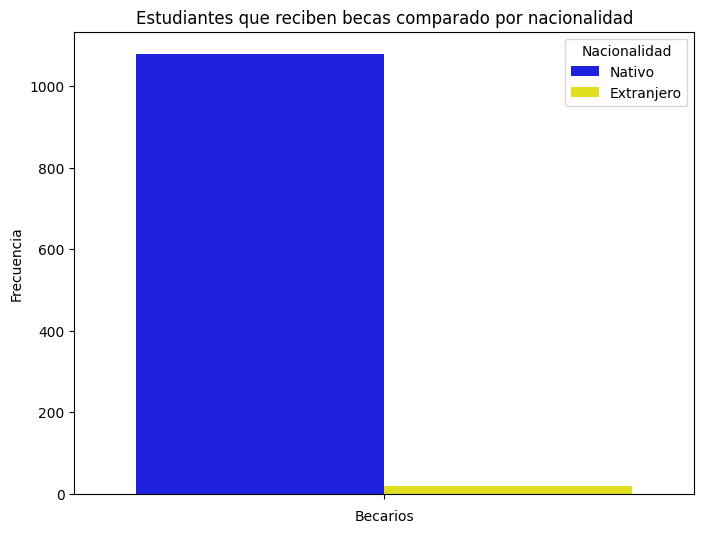

In [73]:
count_plot(data_becarios, x ='scholarship', hue = 'International', palette = {0: "blue", 1: "yellow"}, cat = 'nacionalidad')
plt.legend(title = "Nacionalidad", labels=['Nativo','Extranjero'])
plt.show()

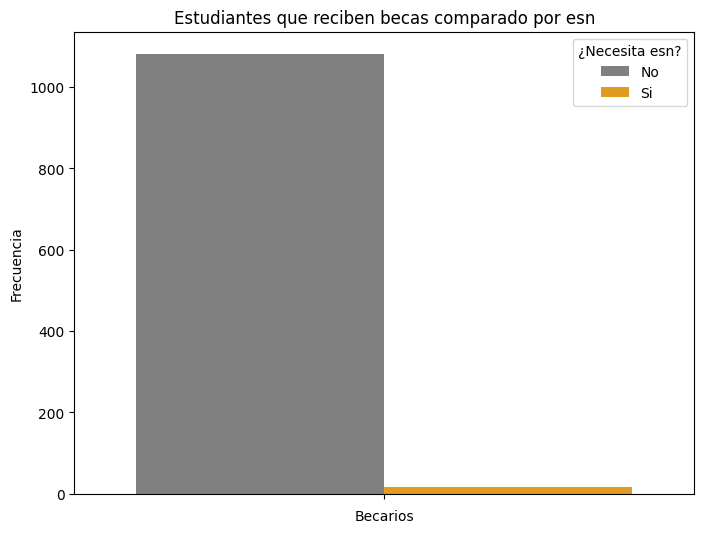

In [78]:
count_plot(data_becarios, x ='scholarship', hue = 'Esn', palette = {0: "gray", 1: "orange"}, cat = 'esn')
plt.legend(title = "¿Necesita esn?", labels=['No','Si'])
plt.show()

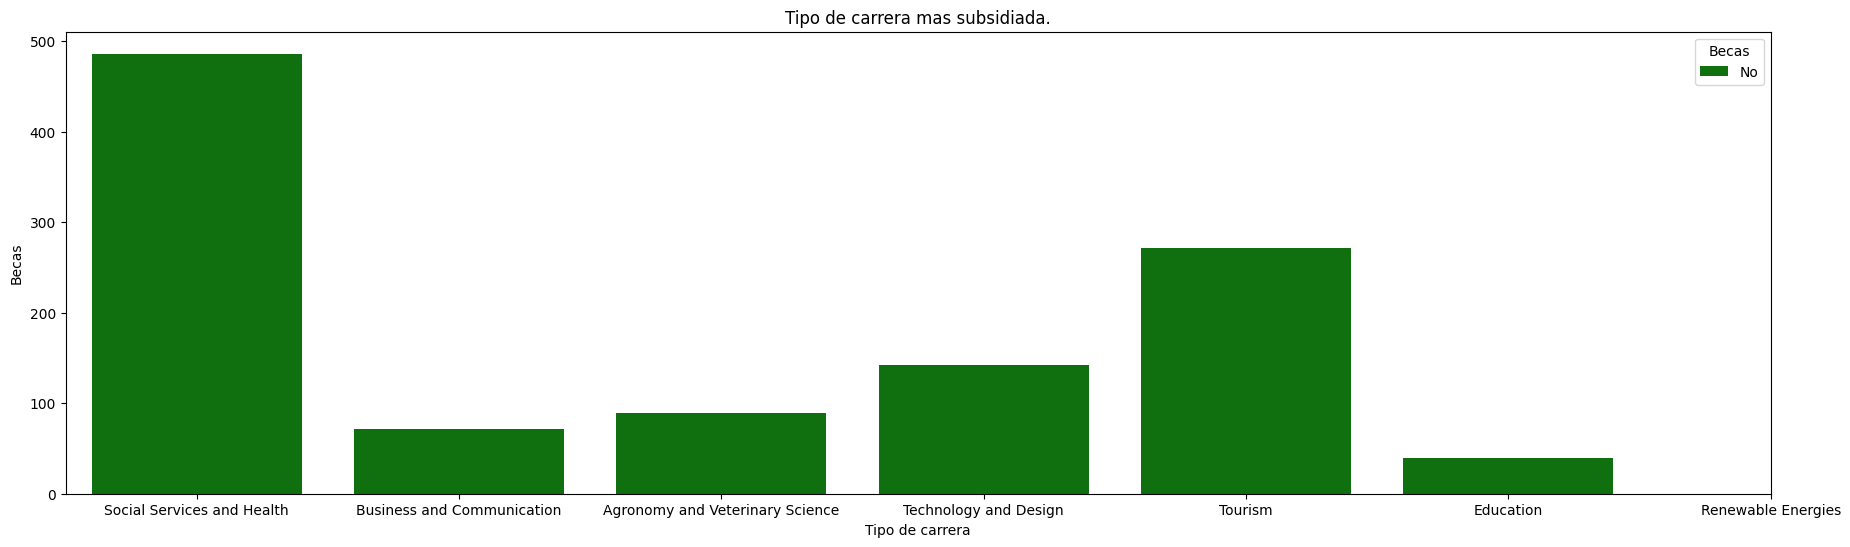

In [87]:
plt.figure(figsize=(22, 6))  # Tamaño de la figura
sns.countplot(data = data_becarios, x ='Sector', hue = 'scholarship',  palette = {1: "green"})
# Personalizar el gráfico
plt.title("Tipo de carrera mas subsidiada.")
plt.xlabel("Tipo de carrera")
plt.ylabel("Becas")
plt.legend(title = "Becas", labels=["No", "Si"])
plt.xticks(ticks=range(len(dic)), labels=dic.keys())
# Mostrar el gráfico
plt.show()

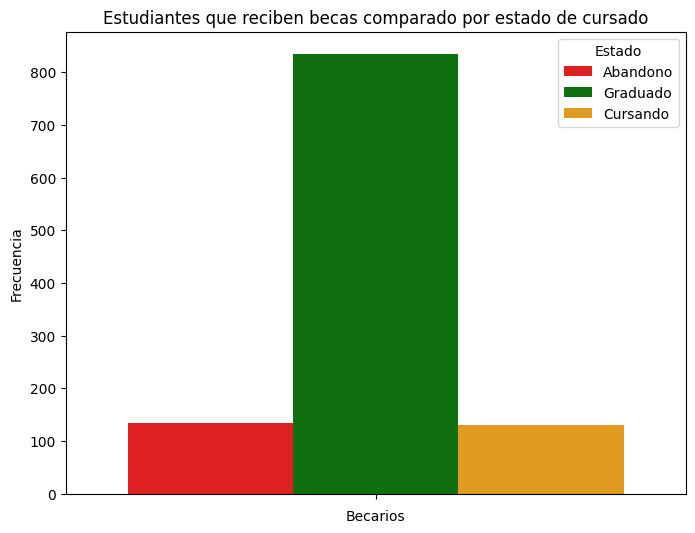

In [88]:
count_plot(data_becarios, x ='scholarship', hue = 'Target', palette = {0: "red", 1: "green", 2: 'orange'}, cat = 'estado de cursado')
plt.legend(title = "Estado", labels=["Abandono", "Graduado", "Cursando"])
plt.show()

## Dentro de la universidad existen 1099 estudiantes cursando gracias a becas universitarias, donde la mayoria son mujeres y no existe ningun tipo de preferencias tanto raciales como por algun tipo de necesidad educativa especial. La universidad financia principalmentre tres areas 'Servicios sociales y salud' que incluye: Servicio social, enfermeria y higiene oral; 'Turismo' y 'Tecnologia y diseño' que incluye: Animación y Multimedia, Informática del Diseño, Ingeniería y Diseño de Comunicación.  Tambien es posible ver que  los estudiantes que han recibido becas tienen mayor tasa de exito.

¿Existe alguna rleacion entyre deudores e inflacion rate?

¿Elos solteros/en pareja terminan la carrera?

Object `rate` not found.
